# [실습] Matplotlib, Seaborn 기본 문법

데이터 시각화는 데이터 분석과정에서 매우 중요한 부분입니다.     
프로젝트 초기 단계 또는 리포팅 단계에서의 탐색적 데이터 분석(EDA)의 일환으로 결과를 다른 사람과 공유할 때 유용합니다.    
또한 데이터를 시각화 하면 값의 분포나 값 사이의 관계를 확인하고 모델링을 위한 가설 도출을 하는데 도움이 됩니다.    

<br><br>

## 1. Matplotlib 라이브러리

### <b>Matplotlib 개요
Matplotlib는 파이썬에서 데이터를 차트나 플롯(Plot)으로 그려주는 가장 많이 사용되는 데이터 시각화(Data Visualization) 패키지로 라인 plot, 바 차트, 파이차트, 히스토그램, Box Plot, Scatter Plot 등을 비롯하여 다양한 차트와 plot 스타일을 지원합니다.    
웹페이지(https://matplotlib.org/index.html) 에서 다양한 샘플 차트를 볼 수 있습니다.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#Matplotlib를 사용하여 간단한 차트를 그리기
plt.plot()
plt.show()

차트 크기 키우기    
차트의 크기는 그림을 표시할 영역의 크기를 키움으로 해결 할 수 있습니다.    
figsize 옵션을 사용해서 조정 합니다. ( 기본 값은 (6,4) )

In [ ]:
plt.figure(figsize=(16,5))
plt.plot([1,2,3], [100,120,110])
plt.show()

<br><br>
## 2. Matplotlib 목적별 차트 그리기
### <b> 선그래프(line plot) 그리기
선 그래프는 수치의 변화를 선으로 이어서 그려 줍니다.    
이 때문에 보통 선그래프는 시간에 따른 데이터의 변화 추세를 볼 때 사용합니다.

In [ ]:
#주간 일별 최고기온 리포트를 그리기
plt.figure()
plt.plot(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], [28,30,29,31,32,31,31] )
plt.show()

Pandas에서 선그래프 그리기

In [ ]:
from impala.dbapi import connect
import pandas as pd

# Step 1: Impala 연결 설정
conn = connect(
    host='apramn102.hyundaicapital.com',  # Hue에서 사용하는 Impala 호스트 주소
    port=21053,               # Impala 기본 포트
    auth_mechanism='GSSAPI'   # 사용할 데이터베이스 이름
)

# Step 2: SQL 쿼리 실행 및 DataFrame으로 변환
query = "SELECT * FROM hcs_t_bdpedu_l2a.cust;"
df = pd.read_sql(query, conn)

# Step 3: 데이터프레임 확인
print(df)

# Step 4: 연결 닫기
conn.close()

하나의 열에 대해서만 시각화 하기

In [ ]:
#avg_bill만으로 그래프 그리기
plt.figure(figsize=(50,30))
plt.plot(df['avg_bill'])
plt.show()

In [ ]:
# 문제
# a_bill, b_bill으로 그래프를 그리시오

### <b>산점도 그리기
산점도는 키와 몸무게 같은 두 값 간의 관계를 표현 합니다.    
두 값이 양의 상관관계인지 음의 상관관계인지를 파악할 수 있습니다.    
산점도 위에 회귀선을 하나 그리면 하나의 값에 따라 다른 값이 어떻게 변하는지를 예측 할 수도 있습니다.    
plt.scatter()를 사용하고 X와 Y값을 지정해야 합니다.

In [ ]:
#avg_bill, age간의 관꼐를 알아보기 위해 산점도 그리기
plt.scatter(y=df["avg_bill"], x=df["age"])
plt.show()

### <b>히스토그램 그리기
히스토그램은 수치형 데이터의 분포를 나타 냅니다.    
흔히 빈도, 빈도밀도, 확율 등의 분포를 그릴때 사용합니다.    
plt.hist()를 사용하며, 구간값(bins)을 정해주지 않으면 10개 구간으로 나누어 그래프를 그려 줍니다.

In [ ]:
#A_bill에 대한 빈도를 10개 구간으로 그리기
# plt.figure()
plt.hist(df["a_bill"])
plt.show()

In [ ]:
#age에 대한 빈도를 20개 구간으로 그리기
plt.figure()
plt.hist(df["age"],bins=20)
plt.show()

### <b> 박스 그래프 그리기
수치적 자료를 표현하는 그래프입니다.   
수치적 자료로부터 얻어낸 통계량인 5가지 요약 수치(최소값, 제 1사분위값, 제 2사분위값, 제 3사분위값, 최대값)를 가지고 그래프를 만듭니다.   
plt.boxplot() 명령어를 사용합니다

In [ ]:
#데이터프레임 박스플롯만들기
df_num = df.select_dtypes(include='number')
plt.boxplot(df_num)
plt.show()

Pandas에서 가로 box plot 그리기    
by는 Group화 할 값(컬럼), column은 박스 그래프로 나타낼 값(컬럼)을 넣어주면 됩니다.

In [ ]:
#나이대별 총이용금액 분포를 박스 그래프로 그리기
df.boxplot(by="by_age", column="avg_bill", figsize=(16,8))
plt.show()

### <b> 막대 그래프(barplot)
막대 그래프는 범주형 데이터의 수치를 요약해서 보여주니다.     
일반적으로 가로,세로,누적,그룹화 된 막대 그래프 등을 사용하며, plt.plot()대신 plt.bar() 명령어를 사용 할수있습니다.

In [ ]:
#임의의 값 리스트를 생성하고, 생성한 리스트를 사용하여 막대 그래프 그리기
y=[5, 3, 7, 10, 9, 5, 3.5, 8]
x=list(range(len(y)))

plt.figure()
plt.bar(x, y)
plt.show()

In [ ]:
#특정 범주형 열에 대해서 막대 그래프 그리기
df['termination'].value_counts().plot(kind='bar')

pandas내 pivot_table 함수를 사용하면 쉽게 수치들에 대한 mean/sum/max등을 구할 수 있습니다.

## 3. 차트 꾸미기
### <b>제목과 축 레이블 추가하기
Plot에 X,Y 축 레이블이나 제목을 붙이기 위해서는 plt.xlabel(축이름), plt.ylabel(축이름), plt.title(제목) 등의 함수를 사용합니다.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#주간 최고기온 그래프 그리기
plt.figure()
plt.plot(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], [28,30,29,31,32,31,31] )
plt.show()

In [ ]:
#주간 최고기온 그래프에 표제목과 X축, Y축 이름 넣기
plt.figure()
plt.plot(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], [28,30,29,31,32,31,31] )
plt.xlabel('Day')
plt.ylabel('Temp')
plt.title('High Temperature')
plt.show()

### <b> 한글 폰트 사용하기
차트에서 한글을 사용하기 위해서는 아래와 같이 한글을 지원하는 폰트를 설정해 주어야 합니다.

In [ ]:
import matplotlib.font_manager as fm
fm.findSystemFonts(fontpaths=None, fontext='ttf')

In [ ]:
#찾은 폰트를 기본 폰트로 설정하기
plt.rc('font', family='NanumGothicCoding')
plt.rc('axes', unicode_minus=False)

In [ ]:
#주간 최고기온 그래프에 표제목과 X축, Y축 이름을 한글로 넣기
plt.plot(["월","화","수","목","금","토","일"], [28,30,29,31,32,31,31] )
plt.xlabel('일')
plt.ylabel('온도')
plt.title('일별 최고 기온')
plt.show()

### <b> 범례 추가하기
플롯에 여러 개의 라인들을 추가하기 위해서는 plt.plot()을 plt.show() 이전에 여러 번 사용하면 됩니다.    
또한, 각 라인에 대한 범례를 추가하기 위해서는 plt.legend() 함수를 사용하여 각 라인에 대한 범례를 순서대로 지정합니다.

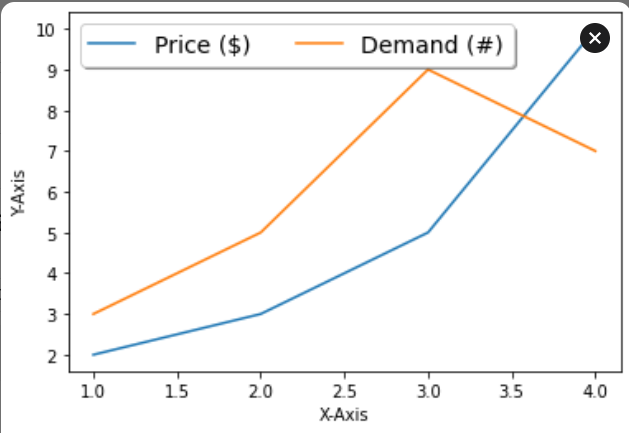

In [ ]:
#두개선을 가지는 임의의 선그래프를 그리고 범례 추가하기
plt.plot([1,2,3], [1,4,9])
plt.plot([2,3,4],[5,6,7])
plt.xlabel('Quarter')
plt.ylabel('Score')
plt.title('Game Result')
plt.legend()
plt.show()

한줄의 plt.plot이라도 여러개의 X,Y 데이터를 가질수 있으며, plot 여러개를 사용한 것과 같이 다수개의 그래프가 만들어 집니다.

### <b> 마커활용하기

In [ ]:
x=list(range(0,10))
y1=list(range(0,10))
y2=list(range(0,20,2))
y3=list(range(0,40,4))

In [ ]:
#(x,y1)(x,y2)(x,y3)의 선그래프를 그리기
plt.plot(x,y1,x,y2, x, y3)
plt.show()

마커를 변경 하려면, 각 x,y값 뒤에 원하는 스타일 문자열을 넣어줍니다.    
스타일 문자열은 색깔(color), 마커(marker), 선 종류(line style)의 순서로 지정하고,    
만약 이 중 일부가 생략되면 기본 값이 적용된다.    
색, 마커, 선 종류에 대한 설명은 plot의 도움말을 참고하도록 합니다.

In [ ]:
#3개의 선을 각기 다른 색과 마커, 선을 사용해 표현하기
#첫 번째 데이터 시리즈 (x, y1):
#색상: 'r' (빨간색)
#마커: 없음
#선 스타일: '--' (점선)

#두 번째 데이터 시리즈 (x, y2):
#색상: 'b' (파란색)
#마커: 's' (정사각형)
#선 스타일: 기본값 (실선)

#세 번째 데이터 시리즈 (x, y3):
#색상: 'g' (초록색)
#마커: '^' (위쪽 삼각형)
#선 스타일: ':' (점선)

plt.plot(x,y1,'r--', x,y2, 'bs' ,x, y3, 'g^:')
plt.show()

### <b> 여러개의 차트 한번에 그리기
지금까지는 하나의 Plot에 여러개의 라인을 추가 하였으나, 한번에 여러개의 plot을 그리는것도 가능합니다.    
plt.show를 사용하여 그래프를 출력하기 전에 여러개의 figure를 열면 여러개의 그래프를 한번에 만들 수 있습니다.

In [ ]:
x=list(range(0,10))
y1=[0,1,2,3,4,5,6,7,8,9]
y2=[0,1,4,9,16,25,36,49,64,81]

In [ ]:
#(x,y), (x,y2)를 두개의 그래프로 동시에 그리기
plt.figure()
plt.plot(x,y1)
plt.figure()
plt.plot(x,y2)

plt.show()

subplot을 사용하여 원하는 배치를 해서 한번에 출력하는것도 가능 합니다.    
이때 subplot에 넘겨주는 값은 3개의 숫자로 앞에서부터 차례대로 행/열/순서 배치순서가 됩니다.

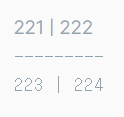

In [ ]:
#subplot을 사용하여 3개의 그래프 영역을 동시에 그리기
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.subplot(222)
plt.subplot(212)

plt.show()

plt.subplot(221)는 2행 2열 배치에 첫번째 영역이 됩니다.    
plt.subplot(222)는 2행 2열 배치에 두번째 영역이 됩니다.    
plt.subplot(212)는 2행 1열 배치의 두번째 영역 즉, 하단 긴 영역이 됩니다.    

In [ ]:
#subplot을 사용하여 임의의 그래프 3개를 동시에 그리기
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.plot([1,2,3], [110,130,120])
plt.grid()

plt.subplot(222)
plt.plot(["월","화","수","목","금","토","일"], [28,30,29,31,32,31,31] )
plt.xlabel('요일')
plt.ylabel('기온')
plt.title('최고기온')
plt.grid()

plt.subplot(212)
y = [5, 3, 7, 10, 9, 5, 3.5, 8]
x = range(len(y))
plt.barh(x, y, height=0.7, color="red")
plt.grid()

plt.show()

## [실습] 수업용 데이터로 그래프 그리기
cust_data.csv 데이터를 불러와서 2개의 그래프를 그려봅시다.   
   
1. 고객의 나이(age) 분포를 확인해 봅시다.
    * 20개 구간으로 나누고, X축에는 '나이', Y축에는 '고객수'로 축이름을 설정합니다.


2. 나이(age)와 평균 요금(avg_bill)간의 관계를 확인하는 그래프를 그려봅시다.
    * 그래프의 크기는 (20,10)으로 설정하고, 색은 녹색으로 합니다

In [ ]:
# 문제
# 위의 문제를 읽고 코드를 작성하시오

<br>
<br>
<br>

## 4. Seaborn 라이브러리
### <b>Seaborn 개요
Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지입니다.    
기본적인 시각화 기능은 Matplotlib 패키지에 의존하게 됩니다. Seaborn에 대한 자세한 내용은 웹사이트(http://seaborn.pydata.org/ )를 참조하세요.

### <b>Seaborn 인스톨 하기

In [ ]:
%pip install seaborn

In [ ]:
#seaborn 패키지 불러오기
%matplotlib inline
import seaborn as sns

In [ ]:
#matplotlib 패키지 불러오기
#seaborn을 사용할떄는 반드시 Matplotlib 패키지도 함께 불러와야 함
import matplotlib.pyplot as plt

In [ ]:
#사용할 데이터 불러오기
import pandas as pd
df=pd.read_csv("/content/cust_data.csv")
df.head()

<br><br>

## 5. Seaborn 목적별 차트 그리기
### <b> scatterplot     
앞서 배웠듯 산점도는 두 값간의 상관관계를 확인해 볼 수 있습니다.

In [ ]:
#avg_bill과 age간의 상관관계를 확인해 봅시다.
sns.scatterplot(x='age', y='avg_bill', data=df)
plt.show()

### <b> Heatmap (상관관계)
상관관계를 확인하기 위해서 주의해야 할 점은 모든 데이터가 'continous'해야 한다는 점입니다.     
corr()은 상관관계를 측정 할 수 있는 함수입니다.

In [ ]:
df.columns

In [ ]:
df.corr(numeric_only=True)

heatmap은 열을 의미하는 heat와 지도를 뜻하는 map을 합친 단어입니다.     
데이터의 배열을 생삭으로 표현해 주는 그래프입니다.     
heatmap을 사용하면 두개의 카테고리 값에 대한 값변화를 한 눈에 알기 쉽기 때문 두 값의 상관관계를 나타낼때 주로 사용 합니다.

In [ ]:
#컬럼별 상과관계를 heatmap 그래프로 그리기
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.show()

# '-' 부호 출력 경고를 제거 하기 위한 코드
#plt.rc('axes', unicode_minus=False)

### <b>boxplot
수치적 자료를 표현하는 그래프입니다.      
수치적 자료로부터 얻어낸 통계량인 5가지 요약 수치(최소값, 제 1사분위값, 제 2사분위값, 제 3사분위값, 최대값)를 가지고 그리며,     
전처리에서 배웠던 describe()함수와 함께 데이터 분포를 확인하는데도 유용하게 사용할수있습니다.

In [ ]:
# 나이대별 avg_bill에 대한 boxplot 그리기
plt.figure(figsize=(16,8))
sns.boxplot(data=df,y='avg_bill', x='by_age',width=0.9)
plt.show()